C-MDS Classical Multi Dimensional Scaling

https://en.wikipedia.org/wiki/Multidimensional_scaling
http://www.nervouscomputer.com/hfs/cmdscale-in-python/

Classical multidimensional scaling (MDS) is a useful way to visualize high-dimensional distance (or “dissimilarity”) data in a few—usually two—dimensions, though it’s actually derived by asking the question, what are the coordinates of a set of points with given pairwise distances? See, for example, Multidimensional Scaling, Second Edition. Matlab has a built-in function, cmdscale, that does this for you, but in Python you have to write your own. Luckily, it’s pretty simple. Here’s the whole thing:

In [98]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
from __future__ import division
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Double Centering matrix         
    #np.eye matrix with 1 in diagonal, zeros elsewhere                                                       
    H = np.eye(n) - np.ones((n, n))/n 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [122]:
import pandas as pd
import os
filename = os.getcwd()+"\\datasets\\line3D.csv"

df=pd.read_csv(filename)                                #Load
X=df.values                                             #to numpy
X= (X  - np.mean(X, axis = 0))#/np.std(X, axis = 0)      #center and scale
X.shape

(201, 3)

<AxesSubplot:>

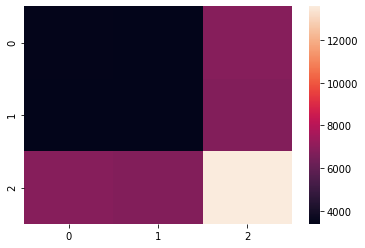

In [123]:
cov_mat = np.cov(X, rowvar = False)
sns.heatmap(cov_mat)